In [43]:
#imports
# !brew install argparse
# !pip install opencv-python
# # !pip list

import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, measure

In [5]:
img = cv2.imread('../images/sample_testing/39.370268924559184_20.078980550436857_sat.png').astype(float)/255
print('Shape: ', img.shape)
# img

#grayscale
img_g = cv2.imread('../images/sample_testing/39.370268924559184_20.078980550436857_sat.png', cv2.COLOR_BGR2GRAY)
print('Shape: ', img_g.shape)
# img

Shape:  (300, 1024, 3)
Shape:  (300, 1024)


In [6]:
cv2.imshow("39.370268924559184_20.078980550436857",img)
cv2.waitKey()

TypeError: destroyWindow() missing required argument 'winname' (pos 1)

In [4]:
cv2.imshow("Gray",img_g)
cv2.waitKey()
cv2.destroyWindow()

In [7]:
#Lossless Save Output to .png
cv2.imwrite('../images/sample_testing/GRAY39.370268924559184_20.078980550436857_sat.png', img_g, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

## Image Segmentation via Watershed

Reference: 
* https://docs.opencv.org/4.8.0/d3/db4/tutorial_py_watershed.html
* OpenCV3 - Image Segmentation using segment seeds via the watershed algorithm (OpenCV3 Computer Vision with Python Cookbook, Chapter 3,Page 94)

In [ ]:
def create_image_markers(path, filename):
    im = cv2.imread(os.join())

In [35]:
gray = cv2.imread('../images/satelite_tiles/39.38106892455916_20.118980550436852_sat.png', cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)
# ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) ## original

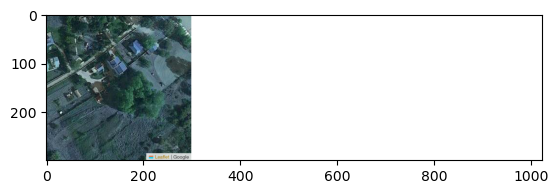

In [36]:
plt.imshow(gray);

In [37]:
img = cv2.imread('../images/satelite_tiles/39.38106892455916_20.118980550436852_sat.png')
show_img = np.copy(img)

seeds = np.full(img.shape[0:2], 0, np.int32)
segmentation = np.full(img.shape, 0, np.uint8)

In [40]:
#Manually Sampled Image Colors
colors = [ #rgb
    # buildings
    (138, 103, 62), # clay tile roof
    (154, 117, 85), # brown roof
    (189, 185, 123), # light yellow roof
    (146, 158, 150), # clean metal roof
    (179, 179, 163), # metal roof bright
    
    #background
    (64, 76, 50), # green tree
    (106, 105, 94), # Gray Ashphalt
    (98, 85, 70), # brown dirt
    (174, 174, 154), # dirt road
    (55, 77, 65), # Sea
]

n_seeds = len(colors)

cv2.watershed(img, seeds)
segmentation = np.full(img.shape, 0, np.uint8)
for m in range(n_seeds):
    segmentation[seeds == (m + 1)] = colors[m]


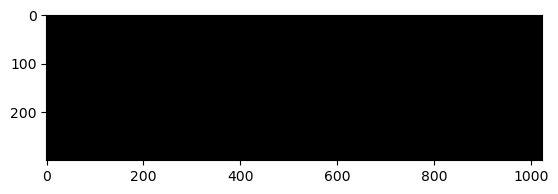

In [41]:
plt.imshow(segmentation)

In [ ]:
## Image Segmentation via Color Spaces

In [ ]:
img = io.imread('../images/sample_testing/39.39246892455913_20.04938055043686_sat.png')

## Converting .png images to Tensors

Cite: OpenCV3 Computer Vision with Python - Spizhevoy & Rybnikov